<a href="https://colab.research.google.com/github/nehayan987-byte/DE-project/blob/main/ML_project_4_random_forest_NEHA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, classification_report
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, accuracy_score, f1_score, roc_auc_score, roc_curve
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [ ]:
df = pd.read_csv('/content/day.csv')

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
numeric_columns = df.select_dtypes(include=['float64','int64']).columns
print(numeric_columns)

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')


In [ ]:
categorical_columns = df.select_dtypes(include=['object','category']).columns
print(categorical_columns)

Index(['dteday'], dtype='object')


In [ ]:
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
def outliers(data):
  q1 = data.quantile(0.25)
  q3 = data.quantile(0.75)
  iqr = q3 - q1
  upper_range = q3+1.5 * iqr
  lower_range = q1-1.5 * iqr
  outliers = data[(data>upper_range) | (data<lower_range)]
  return outliers

  numeric_columns = df.select_dtypes(include['float64','int64']).columns

  for i in numeric_columns:
   result =  outliers(df[i])
   print(i,len(result))



In [ ]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
# univariate analysis
def univariate_analysis(df, column):
  mean = df[column].mean()
  median = df[column].median()
  mode = df[column].mode().values[0]
  std_dev = df[column].std()
  range = df[column].max()-df[column].min()
  print ("mean",mean)
  print("median",median)
  print("mode",mode)
  print ("std_dev", std_dev)
  print ("range", range)
univariate_analysis(df,['workingday'])

mean workingday    0.683995
dtype: float64
median workingday    1.0
dtype: float64
mode [1]
std_dev workingday    0.465233
dtype: float64
range workingday    1
dtype: int64


In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)

             instant    season        yr      mnth   holiday   weekday  \
instant     1.000000  0.412224  0.866025  0.496702  0.016145 -0.000016   
season      0.412224  1.000000 -0.001844  0.831440 -0.010537 -0.003080   
yr          0.866025 -0.001844  1.000000 -0.001792  0.007954 -0.005461   
mnth        0.496702  0.831440 -0.001792  1.000000  0.019191  0.009509   
holiday     0.016145 -0.010537  0.007954  0.019191  1.000000 -0.101960   
weekday    -0.000016 -0.003080 -0.005461  0.009509 -0.101960  1.000000   
workingday -0.004337  0.012485 -0.002013 -0.005901 -0.253023  0.035790   
weathersit -0.021477  0.019211 -0.048727  0.043528 -0.034627  0.031087   
temp        0.150580  0.334315  0.047604  0.220205 -0.028556 -0.000170   
atemp       0.152638  0.342876  0.046106  0.227459 -0.032507 -0.007537   
hum         0.016375  0.205445 -0.110651  0.222204 -0.015937 -0.052232   
windspeed  -0.112620 -0.229046 -0.011817 -0.207502  0.006292  0.014282   
casual      0.275255  0.210399  0.2485

In [ ]:
df.shape

(731, 16)

weathersit
1    463
2    247
3     21
Name: count, dtype: int64
weathersit
1    63.337893
2    33.789330
3     2.872777
Name: proportion, dtype: float64


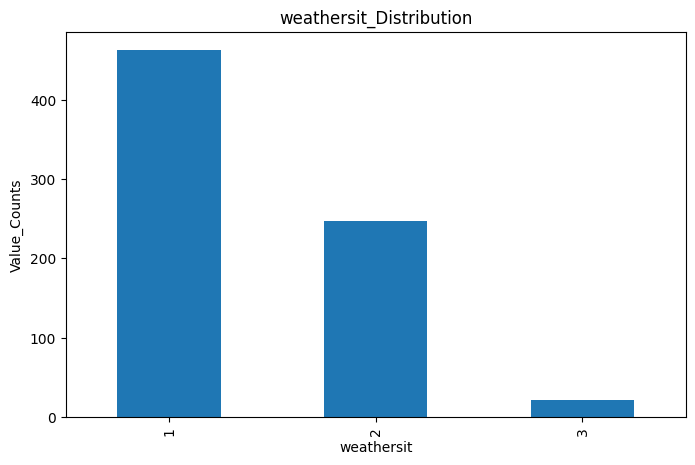

In [ ]:
def univariate_analysis(df, column):
  print(df[column].value_counts())
  print(df[column].value_counts(normalize = True )*100)
  plt.figure(figsize=(8,5))
  df[column].value_counts().plot(kind='bar')
  plt.xlabel('weathersit')
  plt.ylabel('Value_Counts')
  plt.title('weathersit_Distribution')
univariate_analysis(df,'weathersit')

workingday
1    500
0    231
Name: count, dtype: int64
workingday
1    68.399453
0    31.600547
Name: proportion, dtype: float64


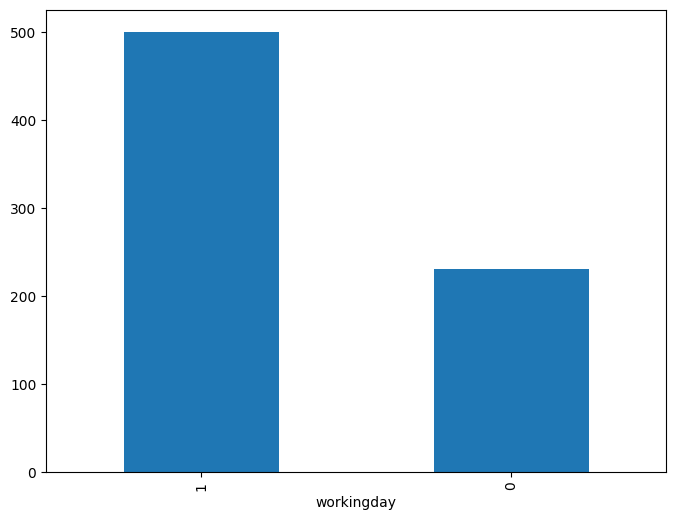

In [ ]:
def univariate_analysis(df, column):
  print(df[column].value_counts())
  print(df[column].value_counts(normalize = True)*100)
  plt.figure(figsize = (8,6))
  df[column].value_counts().plot(kind = 'bar')
univariate_analysis(df,'workingday')


In [ ]:
Mean_registered = df['registered'].mean()
print(Mean_registered)


3656.172366621067


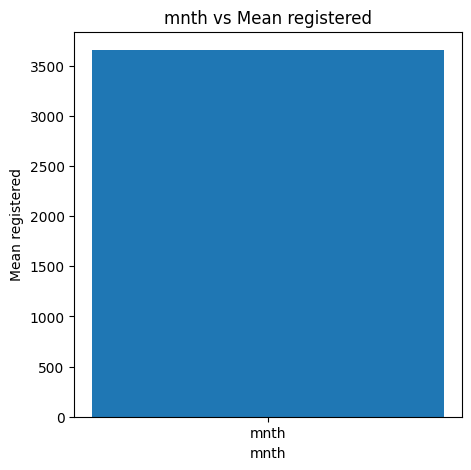

In [ ]:
plt.figure(figsize=(5, 5))
plt.bar(['mnth'], df['registered'].mean())
plt.xlabel('mnth')
plt.ylabel('Mean registered')
plt.title('mnth vs Mean registered')
plt.show()

<Axes: xlabel='mnth'>

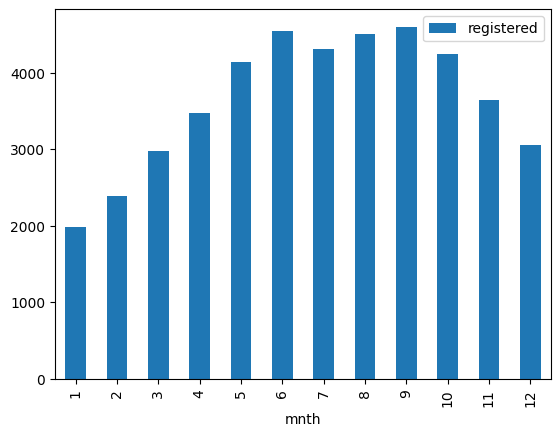

In [ ]:
df.pivot_table(index = 'mnth', values = 'registered', aggfunc = 'mean').plot(kind = 'bar')


<Axes: xlabel='workingday'>

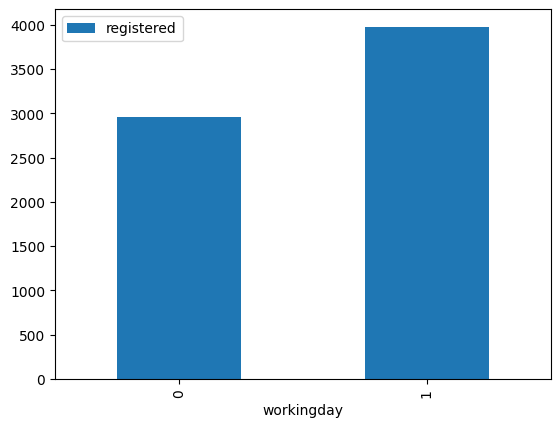

In [ ]:
df.pivot_table(index = 'workingday', values = 'registered', aggfunc = 'mean').plot(kind = 'bar')

In [ ]:
categorical_features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
numerical_features = ['temp', 'atemp', 'hum', 'windspeed']


In [ ]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
categorical_columns = df.select_dtypes(include=['object','category']).columns
print(categorical_columns)

Index(['dteday'], dtype='object')


In [ ]:
data = pd.get_dummies(df, columns = categorical_columns, drop_first = True)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Columns: 745 entries, instant to dteday_2012-12-31
dtypes: bool(730), float64(4), int64(11)
memory usage: 606.9 KB


In [ ]:
from sklearn.model_selection import train_test_split

x = data.drop(['cnt'], axis = 1)
y = data['cnt']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(584, 744)
(147, 744)
(584,)
(147,)


In [ ]:
model = DecisionTreeRegressor()

In [ ]:
x_train.dtypes

,0
instant,int64
season,int64
yr,int64
mnth,int64
holiday,int64
...,...
dteday_2012-12-27,bool
dteday_2012-12-28,bool
dteday_2012-12-29,bool
dteday_2012-12-30,bool


In [ ]:
y_train.dtypes

dtype('int64')

In [ ]:
x_train.columns

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp',
       ...
       'dteday_2012-12-22', 'dteday_2012-12-23', 'dteday_2012-12-24',
       'dteday_2012-12-25', 'dteday_2012-12-26', 'dteday_2012-12-27',
       'dteday_2012-12-28', 'dteday_2012-12-29', 'dteday_2012-12-30',
       'dteday_2012-12-31'],
      dtype='object', length=744)

In [ ]:
model.fit (x_train,y_train)

DecisionTreeRegressor()

In [ ]:
model.score(x_train, y_train)

1.0

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
vc = DecisionTreeRegressor()
parameters = {"max_depth":np.arange(3,10,1),"max_leaf_nodes":[50,75,100,250,300],"min_samples_split":[10,20,30,40,50,60]}
grid_object = GridSearchCV(vc,parameters,cv = 5, verbose = 1 )
grid_object = grid_object.fit(x_train, y_train)
v = grid_object.best_estimator_
print(v)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits
DecisionTreeRegressor(max_depth=8, max_leaf_nodes=300, min_samples_split=10)


In [ ]:
v.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=8, max_leaf_nodes=300, min_samples_split=10)

In [ ]:
regressor_y_pred = v.predict(x_test)
print(regressor_y_pred)

[5941.         3716.8        5125.83333333 7381.53846154 4914.5
 7253.         7715.125      4386.16666667  350.         5125.83333333
 1933.8        3896.35714286 4069.5        8024.25       5684.
 4363.4        4069.5        4807.         6132.25       4770.25
 4807.         5941.         6551.5        7634.75       6236.66666667
 7253.         1578.14285714 4807.         5780.8        5161.5
 5579.125      1093.57142857 2426.75       1852.5        3716.8
 7381.53846154 5684.         3510.63636364 6220.88888889 6788.
 5125.83333333 4914.5        2710.5        2214.125      7381.53846154
 5060.33333333 3842.44444444 7448.81818182 3254.83333333 5684.
 4116.4        3332.         3510.63636364 5368.83333333 3254.83333333
 6220.88888889 7448.81818182 4929.6        2372.         2710.5
 4611.9        7645.5        4929.6        1933.8        6236.66666667
 1634.2        5684.         3944.25       1510.66666667 6788.
 7110.33333333 7253.         7005.71428571 3896.35714286 1510.66666667
 

In [ ]:
regressor_score = v.score(x_test, y_test)
regressor_r2_score = r2_score(y_test, regressor_y_pred)
regressor_mean_error = mean_squared_error(y_test, regressor_y_pred)
regressor_mean_absolute_error = mean_absolute_error(y_test, regressor_y_pred)
print(round(regressor_score,2))
print(round(regressor_r2_score,2))
print(round(regressor_mean_error,2))
print(round(regressor_mean_absolute_error,2))

0.98
0.98
61244.7
167.36


In [ ]:
a = DecisionTreeRegressor()
parameters = {"max_depth":np.arange(3,10,1),"max_leaf_nodes":[50,75,100,250,300],"min_samples_split":[10,20,30,40,50,60]}
randomised_search = RandomizedSearchCV(a,parameters,cv= 5, verbose =1)
randomised_search = randomised_search.fit(x_train, y_train)
s = randomised_search.best_estimator_
print(s)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
DecisionTreeRegressor(max_depth=7, max_leaf_nodes=300, min_samples_split=20)


In [ ]:
s.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=7, max_leaf_nodes=300, min_samples_split=20)

In [ ]:
regressor_y_pred = s.predict(x_test)
print(regressor_y_pred)

[5812.16666667 3817.4        5112.82352941 7332.125      5112.82352941
 7531.5        7715.125      4386.16666667  727.70588235 5112.82352941
 1926.61111111 3726.64       4043.7        8024.25       5684.
 4323.4375     4043.7        4776.75       6132.25       4716.5625
 4776.75       5812.16666667 6642.46153846 7634.75       6610.31578947
 7531.5        1578.14285714 4776.75       6092.35294118 5150.26666667
 5489.         1226.52941176 2415.8        1926.61111111 3817.4
 7332.125      5684.         3726.64       6092.35294118 6642.46153846
 5112.82352941 5112.82352941 2741.85714286 2150.28571429 7332.125
 5060.33333333 3842.44444444 7501.26666667 2686.78947368 5684.
 4211.6        3163.41666667 3726.64       5489.         2686.78947368
 6092.35294118 7501.26666667 5150.26666667 2415.8        2741.85714286
 4716.5625     7501.26666667 5150.26666667 1926.61111111 6610.31578947
 1554.78571429 5684.         3817.4        1554.78571429 6642.46153846
 6610.31578947 7531.5        6990.0769

In [ ]:
regressor_score = s.score(x_test, y_test)
regressor_r2_score = r2_score(y_test, regressor_y_pred)
regressor_mean_error = mean_squared_error(y_test, regressor_y_pred)
regressor_mean_absolute_error = mean_absolute_error(y_test, regressor_y_pred)
print(round(regressor_score,2))
print(round(regressor_r2_score,2))
print(round(regressor_mean_error,2))
print(round(regressor_mean_absolute_error,2))

0.98
0.98
79167.22
206.84


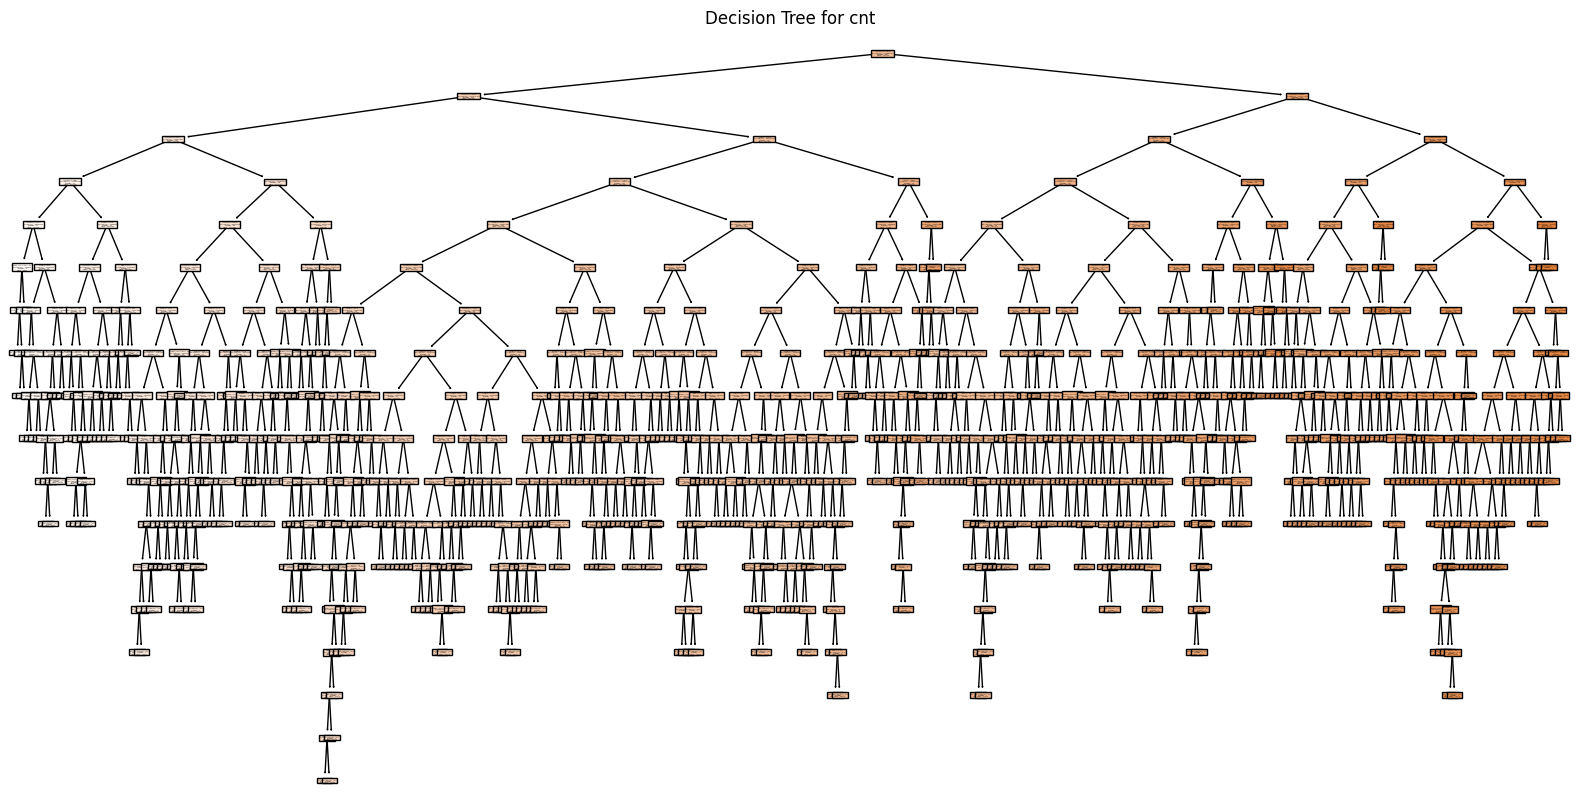

In [ ]:
plt.figure(figsize = (20,10))
tree.plot_tree(model, feature_names=x.columns, filled=True, class_names=[str(x) for x in df['cnt'].unique()])
plt.title('Decision Tree for cnt')
plt.show()

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
categorical_columns = df.select_dtypes(include=['object','category']).columns
print(categorical_columns)

Index(['dteday'], dtype='object')


In [ ]:
numerical_columns = df.select_dtypes(include=['int64','float64']).columns
print(numerical_columns)

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')


In [ ]:
df['temp'].value_counts()

,count
temp,
0.635000,5
0.265833,5
0.680000,4
0.710833,4
0.564167,4
...,...
0.669167,1
0.643333,1
0.707059,1


In [ ]:
df['cnt'].value_counts()

In [ ]:
df_data = pd.get_dummies(df, columns = categorical_columns, drop_first = True)
df_data.head()

In [ ]:
df_data.columns

In [ ]:
df_data ['cnt'].value_counts()

In [ ]:
df_data ['cnt'] = df_data ['cnt'].astype(int)

In [ ]:
df_data = pd.get_dummies(df, columns = categorical_columns, drop_first = True)
df_data.head()

In [ ]:
df_data

In [ ]:
df_data.info()

In [ ]:
boolean_values= df_data.select_dtypes(include=['bool']).columns
print(boolean_values)

In [ ]:
# Convert only numerical columns to integers
numeric_columns = df_data.select_dtypes(include=['float', 'int']).columns
df_data[numeric_columns] = df_data[numeric_columns].astype(int)
df_data.info()

In [ ]:
df_data_x = df_data.drop(['cnt'], axis = 1)
df_data_y = df_data['cnt']

In [ ]:
df_data.shape

In [ ]:
df_data_x_train, df_data_x_test, df_data_y_train, df_data_y_test = train_test_split(df_data_x,df_data_y, test_size = 0.3, random_state = 20)
print(df_data_x_train.shape)
print(df_data_x_test.shape)
print(df_data_y_train.shape)
print(df_data_y_test.shape)